<a href="https://colab.research.google.com/github/rmfpdlxmtidl/MachineLearningAssignments/blob/master/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

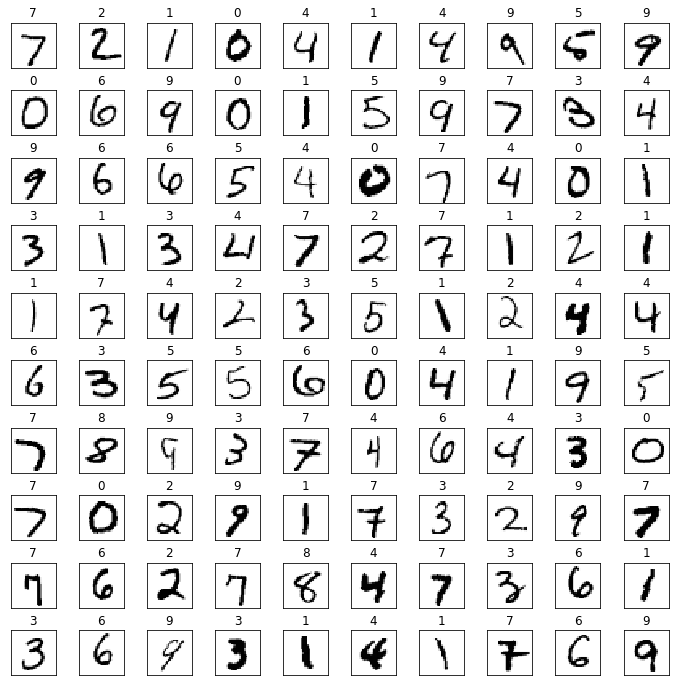

In [25]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "drive/My Drive/Colab Notebooks/Machine Learning/Assignment 08/mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row = 28  # height of the image
size_col = 28  # width of the image

image_count = len(data)

# make a matrix each column of which represents an images in a vector form 
images = np.empty((image_count, size_row * size_col), dtype=float)
labels = np.empty(image_count, dtype=int)

for index, line in enumerate(data):
  label_image = line.split(',')
  labels[index] = label_image[0]
  images[index] = np.asfarray(label_image[1:])

# plot first 100 images out of 10,000 with their labels
f1 = plt.figure(figsize=(12, 12))

for i in range(100):
  label = labels[i]
  image_vector = images[i]
  image_matrix = image_vector.reshape((size_row, size_col))

  plt.subplot(10, 10, i+1)
  plt.title(label)
  plt.imshow(image_matrix, cmap='Greys', interpolation='None')

  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plt.subplots_adjust(hspace=0.5)
plt.show()
